Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

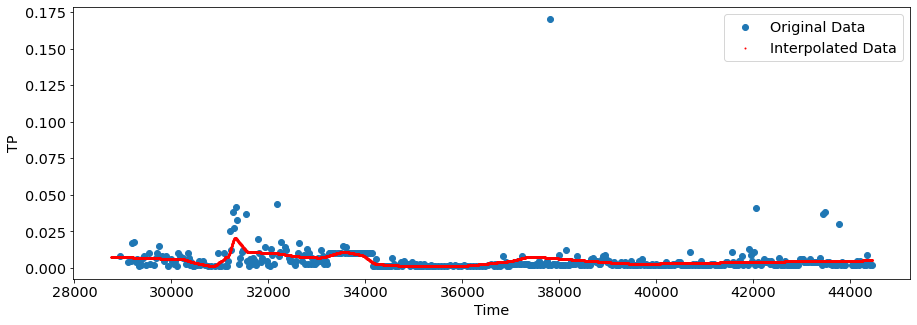

313/313 [==============================] - 0s 353us/step - loss: 7.9903e-18
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//TP/saved_model/my_modelBB47_TP')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/TP_data/BB47.csv")
time = df['time'].values
TP = df['TP'].values
df

#Transform the normalized scale to real scale
TP_min = 0.001
TP_max = 0.17
time_min = 28934.64                        
time_max = 44454.39                            

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(TP_max - TP_min) + TP_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, TP*(TP_max - TP_min) + TP_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('TP')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.420970813
,0.424772421
,0.428702898
,0.432633375
,0.436563852
,0.440494329
,0.44448924
,0.448290849
,0.452221326
,0.456151803
,0.46008228
,0.464012757
,0.468007667
,0.471809276
,0.475739753
,0.47967023
,0.483600707
,0.487531184
,0.491526095
,0.495392138
,0.503253092
,0.830706922
,0.966082857
,0.968015878
,0.970013334
])
interpolation

array([[0.0020187 ],
       [0.00188423],
       [0.00174519],
       [0.00160615],
       [0.00146711],
       [0.00132808],
       [0.00118676],
       [0.00105228],
       [0.00138403],
       [0.00214035],
       [0.003135  ],
       [0.00427638],
       [0.00541803],
       [0.00647541],
       [0.00756861],
       [0.00866656],
       [0.0098858 ],
       [0.01125492],
       [0.01264647],
       [0.01399312],
       [0.01629639],
       [0.01767561],
       [0.02323251],
       [0.02330809],
       [0.02338621]], dtype=float32)